## 1. Importacion de librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Importar utilidades compartidas entre notebooks
from utils import (
    load_all_metrics,
    plot_metrics_comparison,
    create_comparison_table,
    HORIZONS
)

# Configurar estilo de graficas
plt.style.use('seaborn-v0_8-notebook')

# Configuracion de directorios
OUTPUT_DIR = 'output/comparison'
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)


## 2. Carga de metricas

In [ ]:
# Cargar metricas de todos los modelos entrenados
metrics_dict = load_all_metrics('output')


Cargadas metricas de Persistencia
Cargadas metricas de Regresion Lineal
Cargadas metricas de XGBoost
Cargadas metricas de LSTM


In [ ]:
# Mostrar metricas de cada modelo
for model_name, metrics_df in metrics_dict.items():
    print(f"\n{model_name}:")
    print(metrics_df.to_string(index=False))



Persistencia:
 Horizonte      MAE     RMSE  MAE_bikes  SS
        20 0.041512 0.080741   1.077799 0.0
        40 0.062528 0.112425   1.628461 0.0
        60 0.078393 0.135338   2.046322 0.0

Regresion Lineal:
 Horizonte      MAE     RMSE  MAE_bikes        SS
        20 0.045194 0.077555   1.174771 -0.088689
        40 0.065933 0.104103   1.722412 -0.054471
        60 0.080950 0.121777   2.121257 -0.032618

XGBoost:
 Horizonte      MAE     RMSE  MAE_bikes       SS
        20 0.041347 0.074085   1.069571 0.003976
        40 0.058771 0.095327   1.523410 0.060071
        60 0.070679 0.109794   1.835944 0.098405

LSTM:
 Horizonte      MAE     RMSE  MAE_bikes        SS
        20 0.042156 0.074328   1.091183 -0.015515
        40 0.060137 0.098690   1.560492  0.038232
        60 0.072161 0.114709   1.876294  0.079495


## 3. Tabla comparativa

In [ ]:
# Crear tabla comparativa consolidada de todos los modelos
comparison_table = create_comparison_table(metrics_dict)
print("\nTabla comparativa de metricas:")
print("=" * 80)
print(comparison_table.round(6).to_string())
print("=" * 80)



Tabla comparativa de metricas:
                       MAE                          RMSE                            SS                     MAE_bikes                    
Horizonte               20        40        60        20        40        60        20        40        60        20        40        60
Modelo                                                                                                                                  
Persistencia      0.041512  0.062528  0.078393  0.080741  0.112425  0.135338  0.000000  0.000000  0.000000  1.077799  1.628461  2.046322
Regresion Lineal  0.045194  0.065933  0.080950  0.077555  0.104103  0.121777 -0.088689 -0.054471 -0.032618  1.174771  1.722412  2.121257
XGBoost           0.041347  0.058771  0.070679  0.074085  0.095327  0.109794  0.003976  0.060071  0.098405  1.069571  1.523410  1.835944
LSTM              0.042156  0.060137  0.072161  0.074328  0.098690  0.114709 -0.015515  0.038232  0.079495  1.091183  1.560492  1.876294


In [ ]:
# Guardar tabla comparativa en archivo CSV
comparison_table.to_csv(f'{OUTPUT_DIR}/comparison_table.csv')
print(f"Tabla guardada en: {OUTPUT_DIR}/comparison_table.csv")


Tabla guardada en: output/comparison/comparison_table.csv


## 4. Comparacion de MAE por horizonte

In [ ]:
# Configurar parametros para graficas comparativas
models = list(metrics_dict.keys())
horizons = HORIZONS
n_models = len(models)
n_horizons = len(horizons)

# Asignar colores distintivos a cada modelo
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:n_models]


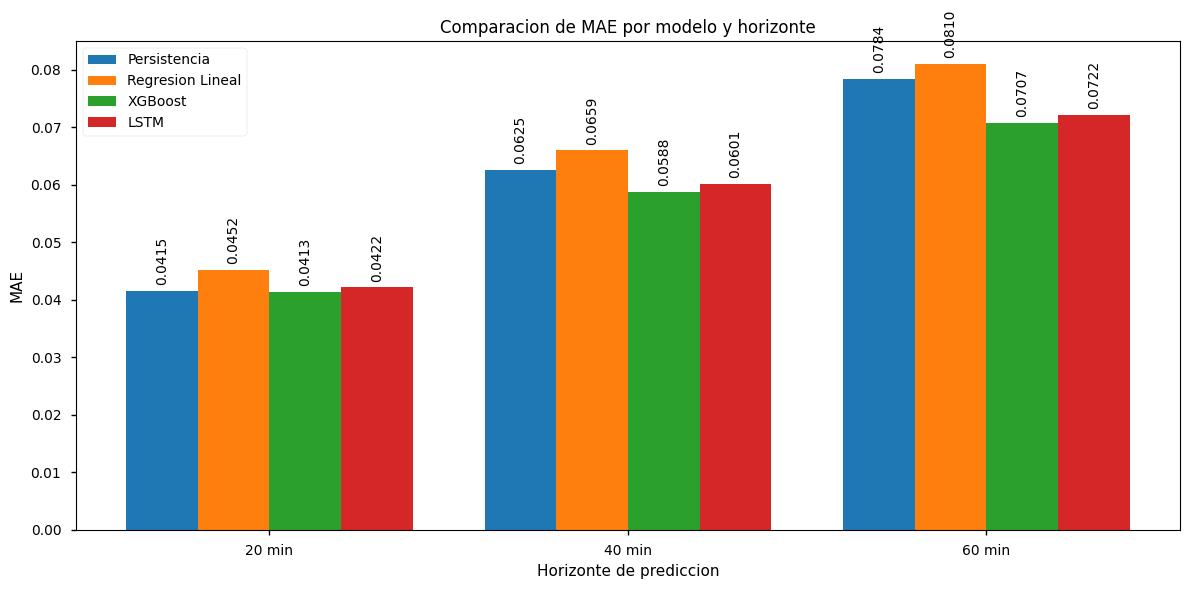

In [ ]:
# Generar grafica comparativa de MAE por modelo y horizonte
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(n_horizons)
width = 0.8 / n_models

for i, model in enumerate(models):
    mae_values = metrics_dict[model]['MAE'].values
    offset = (i - n_models/2 + 0.5) * width
    bars = ax.bar(x + offset, mae_values, width, label=model, color=colors[i])
    
    # Agregar valores sobre las barras
    for bar, val in zip(bars, mae_values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{val:.4f}', ha='center', va='bottom', rotation=90)

ax.set_xlabel('Horizonte de prediccion')
ax.set_ylabel('MAE')
ax.set_title('Comparacion de MAE por modelo y horizonte')
ax.set_xticks(x)
ax.set_xticklabels([f'{h} min' for h in horizons])
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/comparison_mae.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Comparacion de RMSE por horizonte

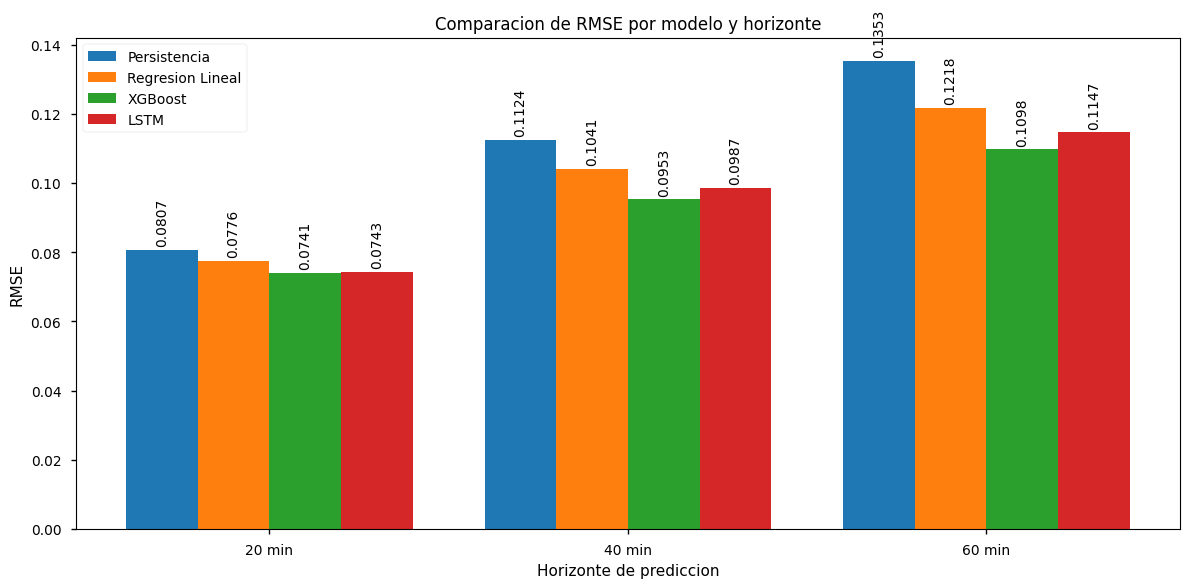

In [ ]:
# Generar grafica comparativa de RMSE por modelo y horizonte
fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models):
    rmse_values = metrics_dict[model]['RMSE'].values
    offset = (i - n_models/2 + 0.5) * width
    bars = ax.bar(x + offset, rmse_values, width, label=model, color=colors[i])
    
    # Agregar valores sobre las barras
    for bar, val in zip(bars, rmse_values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                f'{val:.4f}', ha='center', va='bottom', rotation=90)

ax.set_xlabel('Horizonte de prediccion')
ax.set_ylabel('RMSE')
ax.set_title('Comparacion de RMSE por modelo y horizonte')
ax.set_xticks(x)
ax.set_xticklabels([f'{h} min' for h in horizons])
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/comparison_rmse.png', dpi=300, bbox_inches='tight')
plt.show()


## 5.1 Comparacion de MAE en bicicletas por horizonte

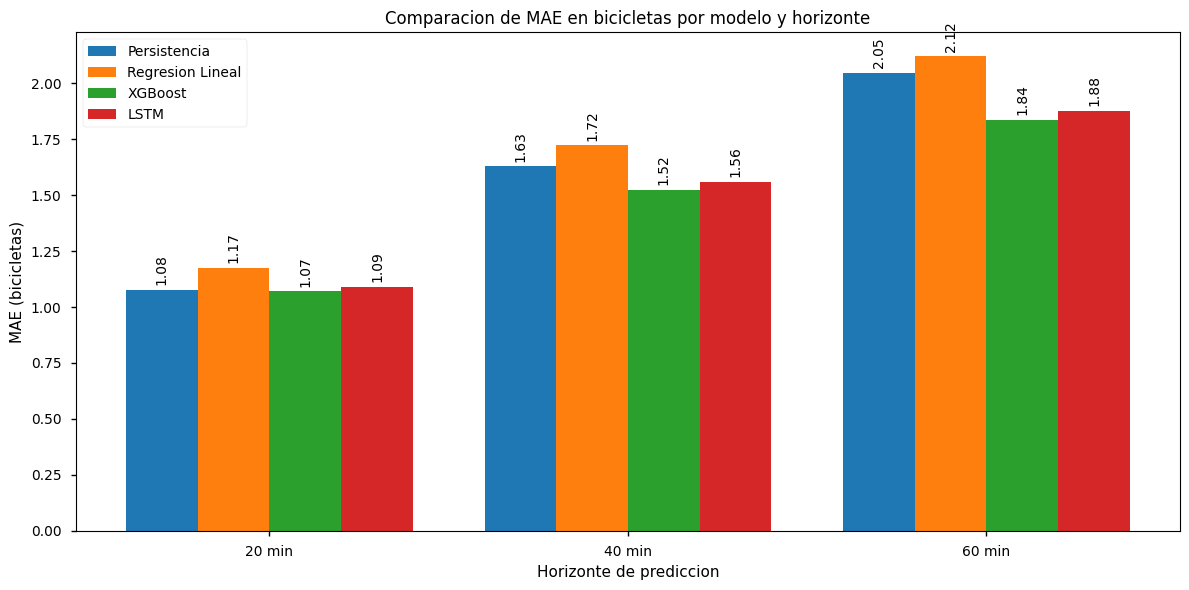

In [ ]:
# Generar grafica comparativa de MAE en bicicletas si esta disponible
has_mae_bikes = all('MAE_bikes' in metrics_dict[model].columns for model in models)

if has_mae_bikes:
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, model in enumerate(models):
        mae_bikes_values = metrics_dict[model]['MAE_bikes'].values
        offset = (i - n_models/2 + 0.5) * width
        bars = ax.bar(x + offset, mae_bikes_values, width, label=model, color=colors[i])
        
        for bar, val in zip(bars, mae_bikes_values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{val:.2f}', ha='center', va='bottom', rotation=90)

    ax.set_xlabel('Horizonte de prediccion')
    ax.set_ylabel('MAE (bicicletas)')
    ax.set_title('Comparacion de MAE en bicicletas por modelo y horizonte')
    ax.set_xticks(x)
    ax.set_xticklabels([f'{h} min' for h in horizons])
    ax.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/comparison_mae_bikes.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Advertencia: MAE_bikes no disponible en los archivos de metricas.")
    print("Ejecutar los notebooks de modelos (0, 1, 2, 3) para generar MAE_bikes.")


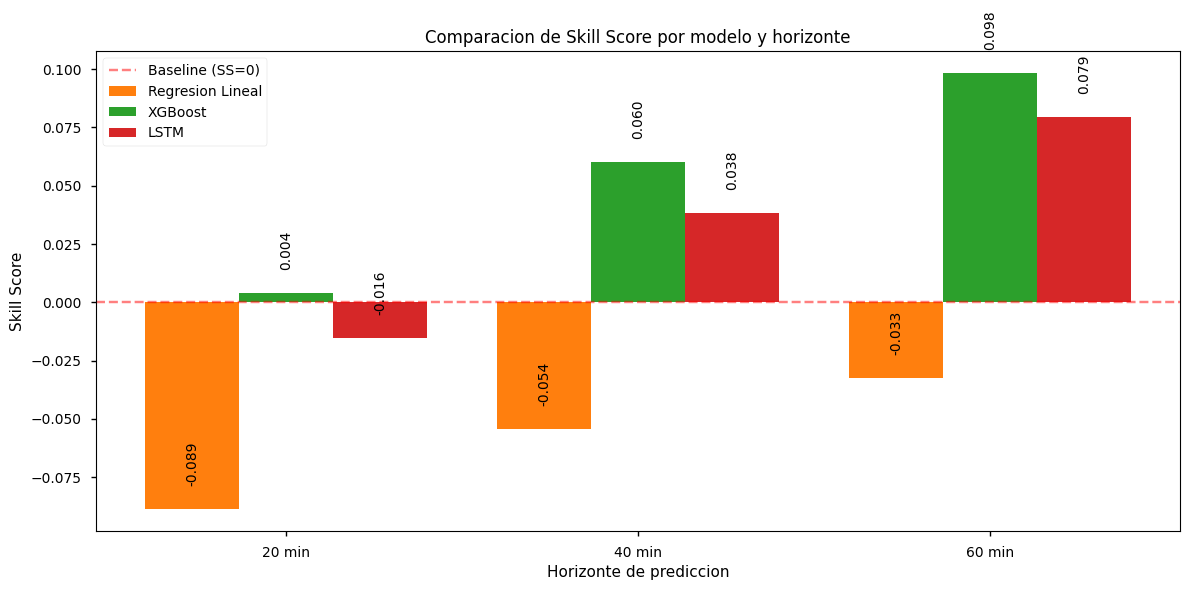

In [ ]:
# Generar grafica comparativa de Skill Score si esta disponible
has_ss = all('SS' in metrics_dict[model].columns for model in models)

if has_ss:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Excluir baseline de la comparacion de Skill Score
    models_no_baseline = [m for m in models if m != 'Persistencia']
    n_models_nb = len(models_no_baseline)
    width_nb = 0.8 / n_models_nb

    for i, model in enumerate(models_no_baseline):
        ss_values = metrics_dict[model]['SS'].values
        offset = (i - n_models_nb/2 + 0.5) * width_nb
        bars = ax.bar(x + offset, ss_values, width_nb, label=model, color=colors[models.index(model)])
        
        for bar, val in zip(bars, ss_values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{val:.3f}', ha='center', va='bottom', rotation=90)

    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Baseline (SS=0)')
    ax.set_xlabel('Horizonte de prediccion')
    ax.set_ylabel('Skill Score')
    ax.set_title('Comparacion de Skill Score por modelo y horizonte')
    ax.set_xticks(x)
    ax.set_xticklabels([f'{h} min' for h in horizons])
    ax.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/comparison_skill_score.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Advertencia: SS no disponible en los archivos de metricas.")
    print("Ejecutar los notebooks de modelos (0, 1, 2, 3) para generar SS.")


## 5.2 Comparacion de Skill Score por horizonte

## 6. Mejora relativa respecto al baseline

In [ ]:
# Calcular mejora relativa de cada modelo respecto al baseline
if 'Persistencia' in metrics_dict:
    baseline_mae = metrics_dict['Persistencia']['MAE'].values
    baseline_rmse = metrics_dict['Persistencia']['RMSE'].values
    
    print("Mejora relativa respecto al baseline (Persistencia):")
    print("=" * 70)
    print(f"{'Modelo':<20} {'Horizonte':<12} {'Mejora MAE':<15} {'Mejora RMSE':<15}")
    print("-" * 70)
    
    improvement_data = []
    
    for model in models:
        if model == 'Persistencia':
            continue
        
        mae_values = metrics_dict[model]['MAE'].values
        rmse_values = metrics_dict[model]['RMSE'].values
        
        for j, horizon in enumerate(horizons):
            mae_improvement = ((baseline_mae[j] - mae_values[j]) / baseline_mae[j]) * 100
            rmse_improvement = ((baseline_rmse[j] - rmse_values[j]) / baseline_rmse[j]) * 100
            
            print(f"{model:<20} {horizon:<12} {mae_improvement:>+10.2f}%     {rmse_improvement:>+10.2f}%")
            
            improvement_data.append({
                'Modelo': model,
                'Horizonte': horizon,
                'Mejora_MAE_%': mae_improvement,
                'Mejora_RMSE_%': rmse_improvement
            })
    
    print("=" * 70)
    
    # Guardar mejoras en archivo CSV
    improvement_df = pd.DataFrame(improvement_data)
    improvement_df.to_csv(f'{OUTPUT_DIR}/improvement_vs_baseline.csv', index=False)


Mejora relativa respecto al baseline (Persistencia):
Modelo               Horizonte    Mejora MAE      Mejora RMSE    
----------------------------------------------------------------------
Regresion Lineal     20                -8.87%          +3.94%
Regresion Lineal     40                -5.45%          +7.40%
Regresion Lineal     60                -3.26%         +10.02%
XGBoost              20                +0.40%          +8.24%
XGBoost              40                +6.01%         +15.21%
XGBoost              60                +9.84%         +18.87%
LSTM                 20                -1.55%          +7.94%
LSTM                 40                +3.82%         +12.22%
LSTM                 60                +7.95%         +15.24%


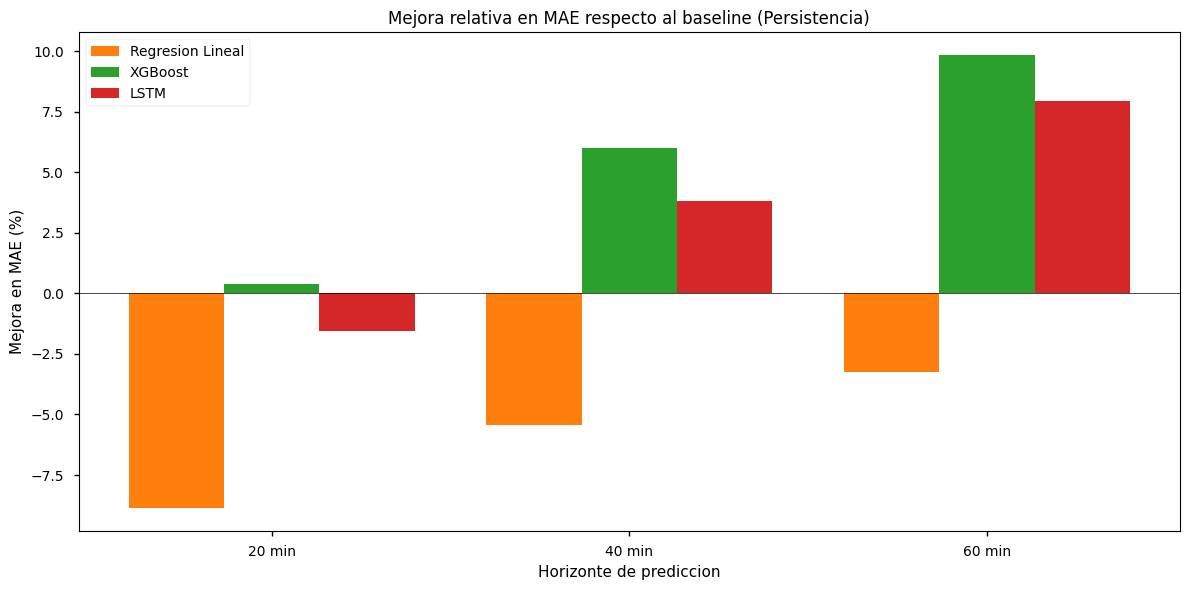

In [ ]:
# Graficar mejora porcentual en MAE respecto al baseline
if 'Persistencia' in metrics_dict:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    models_no_baseline = [m for m in models if m != 'Persistencia']
    n_models_nb = len(models_no_baseline)
    width = 0.8 / n_models_nb
    
    for i, model in enumerate(models_no_baseline):
        mae_values = metrics_dict[model]['MAE'].values
        improvements = ((baseline_mae - mae_values) / baseline_mae) * 100
        offset = (i - n_models_nb/2 + 0.5) * width
        bars = ax.bar(x + offset, improvements, width, label=model, color=colors[i+1])
    
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax.set_xlabel('Horizonte de prediccion')
    ax.set_ylabel('Mejora en MAE (%)')
    ax.set_title('Mejora relativa en MAE respecto al baseline (Persistencia)')
    ax.set_xticks(x)
    ax.set_xticklabels([f'{h} min' for h in horizons])
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/improvement_mae.png', dpi=300, bbox_inches='tight')
    plt.show()


## 7. Evolucion del error por horizonte

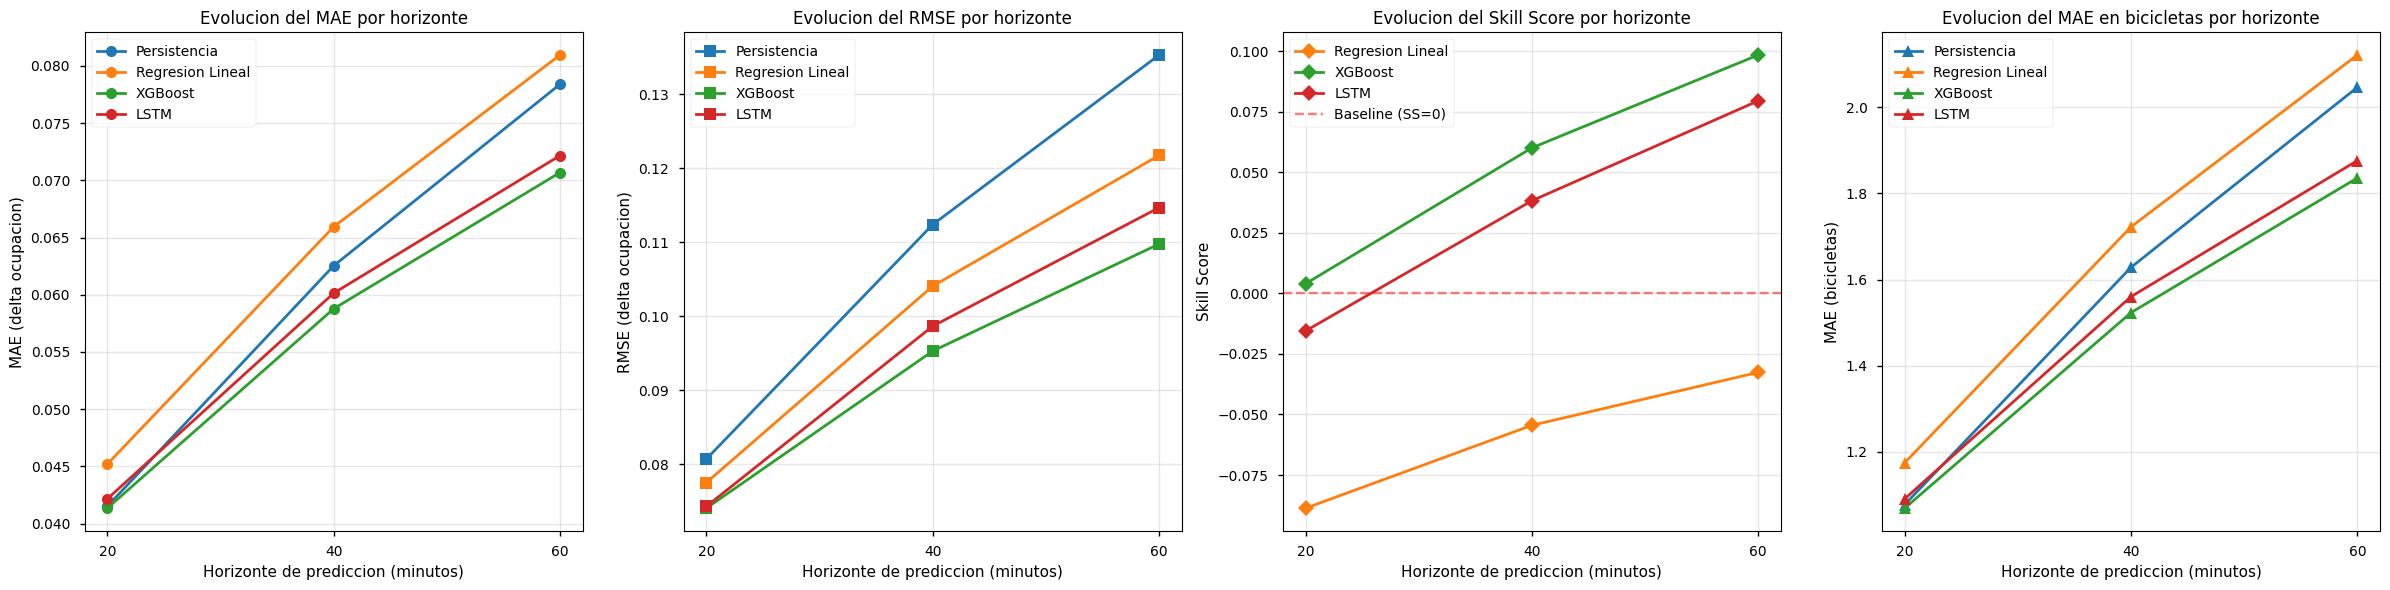

In [ ]:
# Visualizar evolucion de metricas a medida que aumenta el horizonte
# Determinar numero de columnas segun metricas disponibles
n_cols = 2  # MAE y RMSE siempre
if has_ss:
    n_cols += 1
if has_mae_bikes:
    n_cols += 1

fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 6))
if n_cols == 1:
    axes = [axes]

col_idx = 0

# MAE
for i, model in enumerate(models):
    mae_values = metrics_dict[model]['MAE'].values
    axes[col_idx].plot(horizons, mae_values, marker='o', label=model, color=colors[i], linewidth=2, markersize=8)

axes[col_idx].set_xlabel('Horizonte de prediccion (minutos)')
axes[col_idx].set_ylabel('MAE (delta ocupacion)')
axes[col_idx].set_title('Evolucion del MAE por horizonte')
axes[col_idx].legend()
axes[col_idx].set_xticks(horizons)
axes[col_idx].grid(True, alpha=0.3)
col_idx += 1

# RMSE
for i, model in enumerate(models):
    rmse_values = metrics_dict[model]['RMSE'].values
    axes[col_idx].plot(horizons, rmse_values, marker='s', label=model, color=colors[i], linewidth=2, markersize=8)

axes[col_idx].set_xlabel('Horizonte de prediccion (minutos)')
axes[col_idx].set_ylabel('RMSE (delta ocupacion)')
axes[col_idx].set_title('Evolucion del RMSE por horizonte')
axes[col_idx].legend()
axes[col_idx].set_xticks(horizons)
axes[col_idx].grid(True, alpha=0.3)
col_idx += 1

# Skill Score (si esta disponible)
if has_ss:
    for i, model in enumerate(models):
        if model == 'Persistencia':
            continue
        ss_values = metrics_dict[model]['SS'].values
        axes[col_idx].plot(horizons, ss_values, marker='D', label=model, color=colors[i], linewidth=2, markersize=8)

    axes[col_idx].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Baseline (SS=0)')
    axes[col_idx].set_xlabel('Horizonte de prediccion (minutos)')
    axes[col_idx].set_ylabel('Skill Score')
    axes[col_idx].set_title('Evolucion del Skill Score por horizonte')
    axes[col_idx].legend()
    axes[col_idx].set_xticks(horizons)
    axes[col_idx].grid(True, alpha=0.3)
    col_idx += 1

# MAE en bicicletas (si esta disponible)
if has_mae_bikes:
    for i, model in enumerate(models):
        mae_bikes_values = metrics_dict[model]['MAE_bikes'].values
        axes[col_idx].plot(horizons, mae_bikes_values, marker='^', label=model, color=colors[i], linewidth=2, markersize=8)

    axes[col_idx].set_xlabel('Horizonte de prediccion (minutos)')
    axes[col_idx].set_ylabel('MAE (bicicletas)')
    axes[col_idx].set_title('Evolucion del MAE en bicicletas por horizonte')
    axes[col_idx].legend()
    axes[col_idx].set_xticks(horizons)
    axes[col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/metrics_evolution.png', dpi=300, bbox_inches='tight')
plt.show()


## 8. Ranking de modelos

In [ ]:
# Generar ranking de modelos por horizonte temporal
print("Ranking de modelos por horizonte:")
print("=" * 70)

rankings = []

for j, horizon in enumerate(horizons):
    mae_dict = {model: metrics_dict[model]['MAE'].values[j] for model in models}
    mae_sorted = sorted(mae_dict.items(), key=lambda x: x[1])
    
    rmse_dict = {model: metrics_dict[model]['RMSE'].values[j] for model in models}
    rmse_sorted = sorted(rmse_dict.items(), key=lambda x: x[1])
    
    print(f"\nHorizonte {horizon} min:")
    print(f"  Ranking MAE:  {' > '.join([f'{m[0]} ({m[1]:.4f})' for m in mae_sorted])}")
    print(f"  Ranking RMSE: {' > '.join([f'{m[0]} ({m[1]:.4f})' for m in rmse_sorted])}")
    
    for rank, (model, mae_val) in enumerate(mae_sorted, 1):
        rmse_rank = [i for i, (m, _) in enumerate(rmse_sorted, 1) if m == model][0]
        rankings.append({
            'Horizonte': horizon,
            'Modelo': model,
            'MAE': mae_val,
            'Rank_MAE': rank,
            'RMSE': rmse_dict[model],
            'Rank_RMSE': rmse_rank
        })

print("\n" + "=" * 70)


Ranking de modelos por horizonte (mejor = 1):

Horizonte 20 min:
  Ranking MAE:  XGBoost (0.0413) > Persistencia (0.0415) > LSTM (0.0422) > Regresion Lineal (0.0452)
  Ranking RMSE: XGBoost (0.0741) > LSTM (0.0743) > Regresion Lineal (0.0776) > Persistencia (0.0807)

Horizonte 40 min:
  Ranking MAE:  XGBoost (0.0588) > LSTM (0.0601) > Persistencia (0.0625) > Regresion Lineal (0.0659)
  Ranking RMSE: XGBoost (0.0953) > LSTM (0.0987) > Regresion Lineal (0.1041) > Persistencia (0.1124)

Horizonte 60 min:
  Ranking MAE:  XGBoost (0.0707) > LSTM (0.0722) > Persistencia (0.0784) > Regresion Lineal (0.0810)
  Ranking RMSE: XGBoost (0.1098) > LSTM (0.1147) > Regresion Lineal (0.1218) > Persistencia (0.1353)



In [ ]:
# Calcular ranking promedio de modelos
ranking_df = pd.DataFrame(rankings)

avg_ranking = ranking_df.groupby('Modelo').agg({
    'MAE': 'mean',
    'RMSE': 'mean',
    'Rank_MAE': 'mean',
    'Rank_RMSE': 'mean'
}).round(4)

avg_ranking['Rank_Promedio'] = (avg_ranking['Rank_MAE'] + avg_ranking['Rank_RMSE']) / 2
avg_ranking = avg_ranking.sort_values('Rank_Promedio')

print("\nRanking promedio de modelos:")
print(avg_ranking.to_string())



Ranking promedio de modelos:
                     MAE    RMSE  Rank_MAE  Rank_RMSE  Rank_Promedio
Modelo                                                              
XGBoost           0.0569  0.0931    1.0000        1.0        1.00000
LSTM              0.0582  0.0959    2.3333        2.0        2.16665
Persistencia      0.0608  0.1095    2.6667        4.0        3.33335
Regresion Lineal  0.0640  0.1011    4.0000        3.0        3.50000


In [ ]:
# Guardar rankings en archivos CSV
ranking_df.to_csv(f'{OUTPUT_DIR}/rankings_by_horizon.csv', index=False)
avg_ranking.to_csv(f'{OUTPUT_DIR}/average_rankings.csv')
print(f"\nRankings guardados en: {OUTPUT_DIR}")



Rankings guardados en: output/comparison


## 9. Heatmap de metricas

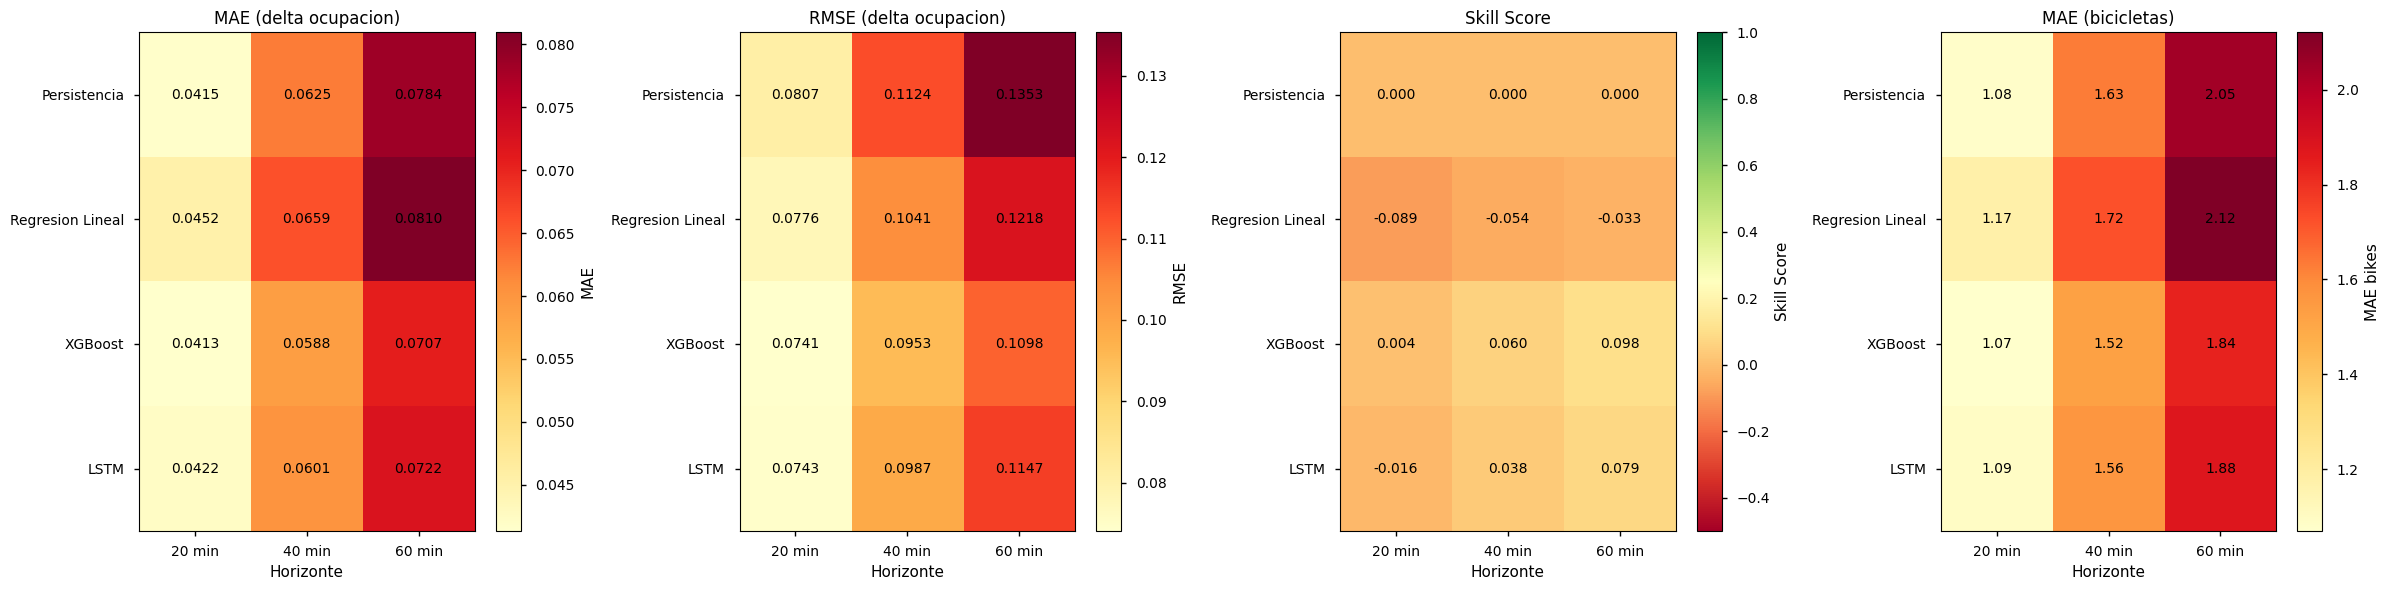

In [ ]:
# Generar heatmaps para visualizacion compacta de todas las metricas
# Crear matrices para heatmaps
mae_matrix = np.zeros((len(models), len(horizons)))
rmse_matrix = np.zeros((len(models), len(horizons)))

for i, model in enumerate(models):
    mae_matrix[i] = metrics_dict[model]['MAE'].values
    rmse_matrix[i] = metrics_dict[model]['RMSE'].values

# Heatmaps - Determinar numero de columnas
n_cols = 2  # MAE y RMSE siempre
if has_ss:
    n_cols += 1
if has_mae_bikes:
    n_cols += 1

fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 6))
if n_cols == 1:
    axes = [axes]

col_idx = 0

# MAE heatmap
im1 = axes[col_idx].imshow(mae_matrix, cmap='YlOrRd', aspect='auto')
axes[col_idx].set_xticks(range(len(horizons)))
axes[col_idx].set_xticklabels([f'{h} min' for h in horizons])
axes[col_idx].set_yticks(range(len(models)))
axes[col_idx].set_yticklabels(models)
axes[col_idx].set_xlabel('Horizonte')
axes[col_idx].set_title('MAE (delta ocupacion)')

for i in range(len(models)):
    for j in range(len(horizons)):
        axes[col_idx].text(j, i, f'{mae_matrix[i, j]:.4f}', ha='center', va='center', color='black')

fig.colorbar(im1, ax=axes[col_idx], label='MAE')
col_idx += 1

# RMSE heatmap
im2 = axes[col_idx].imshow(rmse_matrix, cmap='YlOrRd', aspect='auto')
axes[col_idx].set_xticks(range(len(horizons)))
axes[col_idx].set_xticklabels([f'{h} min' for h in horizons])
axes[col_idx].set_yticks(range(len(models)))
axes[col_idx].set_yticklabels(models)
axes[col_idx].set_xlabel('Horizonte')
axes[col_idx].set_title('RMSE (delta ocupacion)')

for i in range(len(models)):
    for j in range(len(horizons)):
        axes[col_idx].text(j, i, f'{rmse_matrix[i, j]:.4f}', ha='center', va='center', color='black')

fig.colorbar(im2, ax=axes[col_idx], label='RMSE')
col_idx += 1

# Skill Score heatmap (si esta disponible)
if has_ss:
    ss_matrix = np.zeros((len(models), len(horizons)))
    for i, model in enumerate(models):
        ss_matrix[i] = metrics_dict[model]['SS'].values
    
    im_ss = axes[col_idx].imshow(ss_matrix, cmap='RdYlGn', aspect='auto', vmin=-0.5, vmax=1.0)
    axes[col_idx].set_xticks(range(len(horizons)))
    axes[col_idx].set_xticklabels([f'{h} min' for h in horizons])
    axes[col_idx].set_yticks(range(len(models)))
    axes[col_idx].set_yticklabels(models)
    axes[col_idx].set_xlabel('Horizonte')
    axes[col_idx].set_title('Skill Score')

    for i in range(len(models)):
        for j in range(len(horizons)):
            axes[col_idx].text(j, i, f'{ss_matrix[i, j]:.3f}', ha='center', va='center', color='black')

    fig.colorbar(im_ss, ax=axes[col_idx], label='Skill Score')
    col_idx += 1

# MAE bikes heatmap (si esta disponible)
if has_mae_bikes:
    mae_bikes_matrix = np.zeros((len(models), len(horizons)))
    for i, model in enumerate(models):
        mae_bikes_matrix[i] = metrics_dict[model]['MAE_bikes'].values
    
    im3 = axes[col_idx].imshow(mae_bikes_matrix, cmap='YlOrRd', aspect='auto')
    axes[col_idx].set_xticks(range(len(horizons)))
    axes[col_idx].set_xticklabels([f'{h} min' for h in horizons])
    axes[col_idx].set_yticks(range(len(models)))
    axes[col_idx].set_yticklabels(models)
    axes[col_idx].set_xlabel('Horizonte')
    axes[col_idx].set_title('MAE (bicicletas)')

    for i in range(len(models)):
        for j in range(len(horizons)):
            axes[col_idx].text(j, i, f'{mae_bikes_matrix[i, j]:.2f}', ha='center', va='center', color='black')

    fig.colorbar(im3, ax=axes[col_idx], label='MAE bikes')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/heatmap_metrics.png', dpi=300, bbox_inches='tight')
plt.show()


## 10. Resumen ejecutivo

In [ ]:
# Generar resumen ejecutivo con conclusiones principales
print("=" * 80)
print("RESUMEN EJECUTIVO - COMPARACION DE MODELOS")
print("=" * 80)

print("\nMejor modelo por horizonte y metrica:")
print("-" * 50)

best_models = {}
for j, horizon in enumerate(horizons):
    mae_dict = {model: metrics_dict[model]['MAE'].values[j] for model in models}
    best_mae_model = min(mae_dict, key=mae_dict.get)
    
    rmse_dict = {model: metrics_dict[model]['RMSE'].values[j] for model in models}
    best_rmse_model = min(rmse_dict, key=rmse_dict.get)
    
    print(f"\n  Horizonte {horizon} min:")
    print(f"    Mejor MAE:  {best_mae_model} ({mae_dict[best_mae_model]:.6f})")
    print(f"    Mejor RMSE: {best_rmse_model} ({rmse_dict[best_rmse_model]:.6f})")
    
    best_models[horizon] = {'MAE': best_mae_model, 'RMSE': best_rmse_model}

print("\n" + "-" * 50)

global_ranking = avg_ranking.sort_values('Rank_Promedio').index[0]
print(f"\nMejor modelo global (ranking promedio): {global_ranking}")

print("\n" + "=" * 80)
print("\nConclusiones:")
print("-" * 50)

if 'Persistencia' in metrics_dict:
    print("\nModelos que superan al baseline (Persistencia) en MAE:")
    for model in models:
        if model == 'Persistencia':
            continue
        
        mae_model = metrics_dict[model]['MAE'].values
        mae_baseline = metrics_dict['Persistencia']['MAE'].values
        
        improvements = [((mae_baseline[j] - mae_model[j]) / mae_baseline[j]) * 100 for j in range(len(horizons))]
        avg_improvement = np.mean(improvements)
        
        if avg_improvement > 0:
            print(f"  - {model}: mejora promedio de {avg_improvement:.2f}%")
        else:
            print(f"  - {model}: no supera al baseline (empeora {-avg_improvement:.2f}%)")

print("\n" + "=" * 80)


RESUMEN EJECUTIVO - COMPARACION DE MODELOS

Mejor modelo por horizonte y metrica:
--------------------------------------------------

  Horizonte 20 min:
    Mejor MAE:  XGBoost (0.041347)
    Mejor RMSE: XGBoost (0.074085)

  Horizonte 40 min:
    Mejor MAE:  XGBoost (0.058771)
    Mejor RMSE: XGBoost (0.095327)

  Horizonte 60 min:
    Mejor MAE:  XGBoost (0.070679)
    Mejor RMSE: XGBoost (0.109794)

--------------------------------------------------

Mejor modelo global (ranking promedio): XGBoost


Conclusiones:
--------------------------------------------------

Modelos que superan al baseline (Persistencia) en MAE:
  - Regresion Lineal: NO supera al baseline (empeora 5.86%)
  - XGBoost: mejora promedio de 5.42%
  - LSTM: mejora promedio de 3.41%



In [ ]:
# Guardar resumen en formato JSON
summary = {
    'mejor_modelo_global': global_ranking,
    'mejor_modelo_por_horizonte': best_models,
    'ranking_promedio': avg_ranking.to_dict()
}

import json
with open(f'{OUTPUT_DIR}/summary.json', 'w') as f:
    json.dump(summary, f, indent=2, default=str)

print(f"Resumen guardado en: {OUTPUT_DIR}/summary.json")


Resumen guardado en: output/comparison/summary.json


In [ ]:
print("\n" + "=" * 80)
print("ARCHIVOS GENERADOS")
print("=" * 80)
print(f"\nDirectorio: {OUTPUT_DIR}")
print("\nArchivos:")
for f in sorted(Path(OUTPUT_DIR).glob('*')):
    print(f"  - {f.name}")
print("=" * 80)



ARCHIVOS GENERADOS

Directorio: output/comparison

Archivos:
  - average_rankings.csv
  - comparison_mae.png
  - comparison_mae_bikes.png
  - comparison_rmse.png
  - comparison_skill_score.png
  - comparison_table.csv
  - heatmap_metrics.png
  - improvement_mae.png
  - improvement_vs_baseline.csv
  - metrics_evolution.png
  - rankings_by_horizon.csv
  - summary.json
